Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [1]:
!pip install pymystem3

In [2]:
import re

In [3]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [7]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

In [ ]:
print(text_analyzed[4])

In [ ]:
print(type(text_analyzed))

Можно делать отдельные вещи:

In [ ]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

Можно склеить всё в один лемматизированный текст:

In [ ]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

In [ ]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

In [ ]:
text_analyzed[0] #чтобы понять, что происходит наверху

Функция, чтобы прикрепить частеречные теги к словам

In [ ]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [ ]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

Можно посмотреть предсказания для отдельных слов:

In [ ]:
mystem.analyze('стекла')

In [ ]:
mystem.analyze('стали')

In [ ]:
mystem.analyze('стекла и стали нам не хватает')

In [ ]:
mystem.analyze('кринжевать')

In [ ]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [ ]:
mystem.analyze('мы стали более лучше одеваться')

In [ ]:
mystem.analyze('сплав стали')

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [22]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [24]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [12]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [20]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [25]:
nltk.download('averaged_perceptron_tagger_rus')
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

[nltk_data] Downloading package averaged_perceptron_tagger_rus to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_rus.zip.


[('И', 'CONJ'),
 ('пунша', 'S'),
 ('пламень', 'S'),
 ('голубой', 'A=m'),
 ('.', 'NONLEX'),
 ('Люблю', 'V'),
 ('воинственную', 'A=f'),
 ('живость', 'S'),
 ('Потешных', 'A=pl'),
 ('Марсовых', 'A=pl'),
 ('полей', 'S'),
 (',', 'NONLEX'),
 ('Пехотных', 'A=pl'),
 ('ратей', 'S'),
 ('и', 'CONJ'),
 ('коней', 'A=f'),
 ('Однообразную', 'A=f'),
 ('красивость', 'S'),
 (',', 'NONLEX'),
 ('В', 'PR'),
 ('их', 'A-PRO'),
 ('стройно', 'ADV'),
 ('зыблемом', 'V'),
 ('строю', 'S'),
 ('Лоскутья', 'S'),
 ('сих', 'A-PRO=pl'),
 ('знамён', 'S'),
 ('победных', 'A=pl'),
 (',', 'NONLEX'),
 ('Сиянье', 'S'),
 ('шапок', 'S'),
 ('этих', 'A-PRO=pl'),
 ('медных', 'A=pl'),
 (',', 'NONLEX'),
 ('Насквозь', 'ADV'),
 ('простреленных', 'V'),
 ('в', 'PR'),
 ('бою', 'S'),
 ('.', 'NONLEX')]

Можно "подклеить" для удобства тэги к слову.

In [26]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['И_CONJ', 'пунша_S', 'пламень_S', 'голубой_A=m', '._NONLEX', 'Люблю_V', 'воинственную_A=f', 'живость_S', 'Потешных_A=pl', 'Марсовых_A=pl', 'полей_S', ',_NONLEX', 'Пехотных_A=pl', 'ратей_S', 'и_CONJ', 'коней_A=f', 'Однообразную_A=f', 'красивость_S', ',_NONLEX', 'В_PR', 'их_A-PRO', 'стройно_ADV', 'зыблемом_V', 'строю_S', 'Лоскутья_S', 'сих_A-PRO=pl', 'знамён_S', 'победных_A=pl', ',_NONLEX', 'Сиянье_S', 'шапок_S', 'этих_A-PRO=pl', 'медных_A=pl', ',_NONLEX', 'Насквозь_ADV', 'простреленных_V', 'в_PR', 'бою_S', '._NONLEX']


In [29]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

Файл успешно прочитан. Длина текста: 3571 символов
Тип переменной text_string: <class 'str'>


'A Day in the Life of a University Student\nThe shri'

In [30]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

A_DET Day_NOUN in_ADP the_DET Life_NOUN of_ADP a_DET University_NOUN Student_NOUN The_DET shrill_NOUN sound_NOUN of_ADP my_PRON alarm_NOUN pierces_NOUN through_ADP the_DET darkness_NOUN at_ADP 6:30_NUM AM_NOUN ._. I_PRON groan_VERB and_CONJ reach_VERB for_ADP my_PRON phone_NOUN ,_. hitting_VERB snooze_ADJ one_NUM more_ADJ time—a_ADJ daily_ADJ ritual_NOUN that_DET buys_VERB me_PRON those_DET precious_ADJ ten_ADJ minutes_NOUN of_ADP extra_ADJ sleep_NOUN ._. When_ADV I_PRON finally_ADV drag_VERB myself_PRON out_ADP of_ADP bed_NOUN ,_. the_DET small_ADJ dorm_NOUN room_NOUN is_VERB still_ADV dark_ADJ ,_. my_PRON roommate_NOUN 's_PRT gentle_ADJ snoring_VERB a_DET reminder_NOUN that_ADP not_ADV everyone_NOUN has_VERB early_ADJ morning_NOUN lectures_NOUN ._. Morning_NOUN classes_NOUN are_VERB always_ADV a_DET challenge_NOUN ._. I_PRON quickly_ADV shower_VERB ,_. grab_VERB a_DET granola_NOUN bar_NOUN ,_. and_CONJ fill_VERB my_PRON travel_NOUN mug_NOUN with_ADP coffee—the_ADJ lifeblood_NOUN of_A

Сколько у нас частей речи определенного вида?

In [31]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

Your text has 51 adjectives.


In [32]:
from nltk import FreqDist

In [9]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [14]:
stop_words = set(stopwords.words("english"))

In [33]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

In [ ]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [ ]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


In [ ]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

Результаты сравнения трёх методов


==================== 1_Токены ====================

→ 1_Токены — Русский


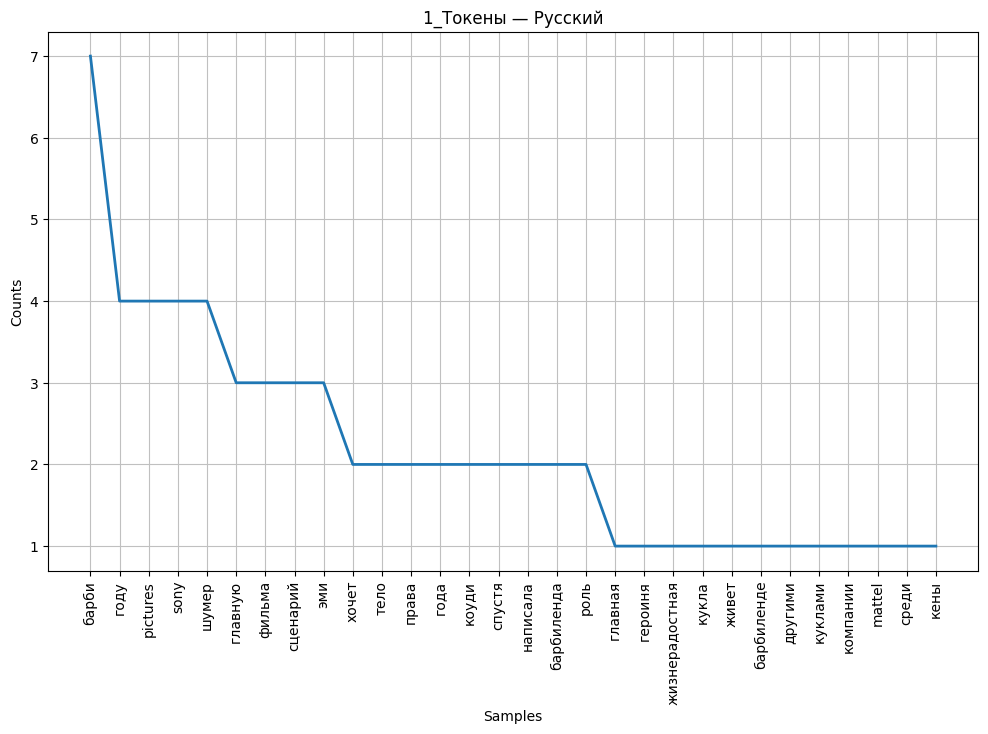

→ 1_Токены — English


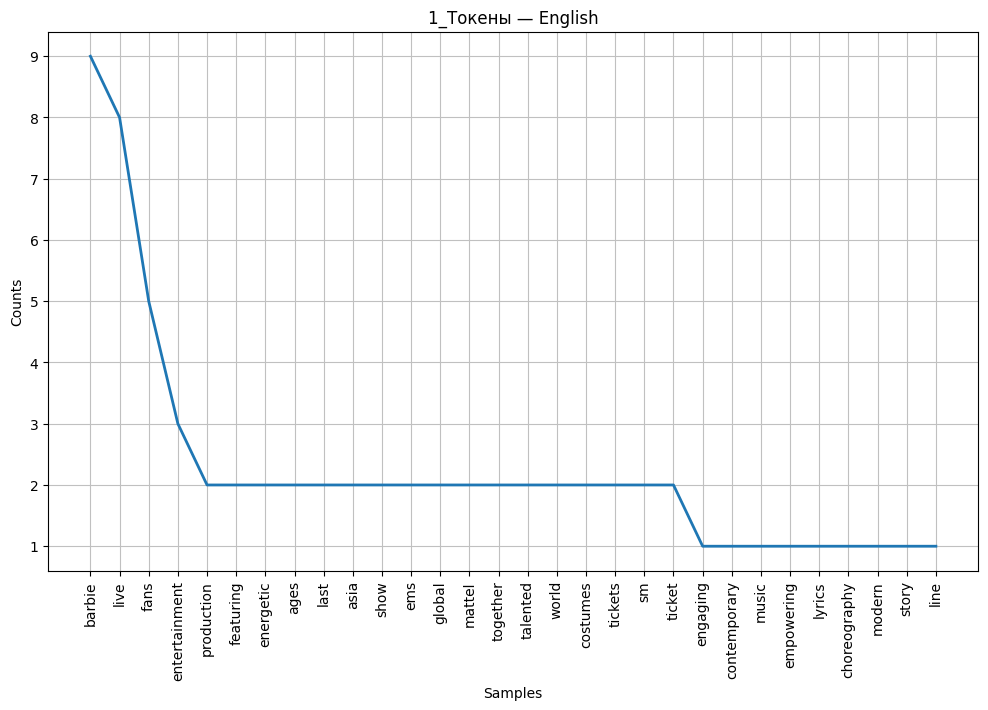


==================== 2_POS ====================

→ 2_POS — Русский


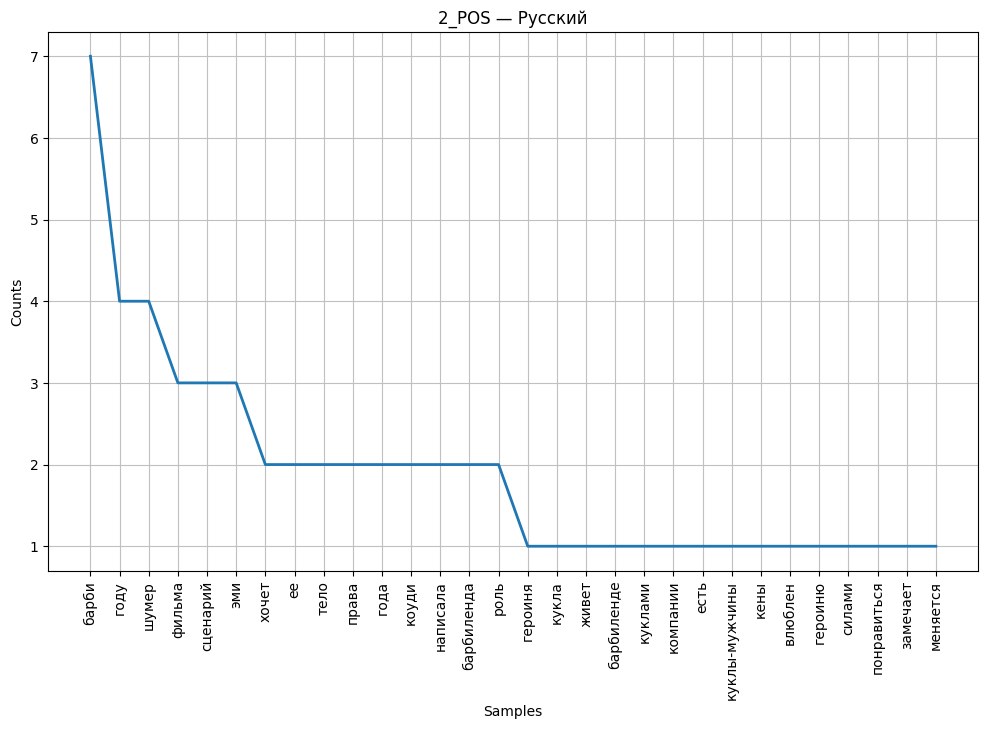

→ 2_POS — English


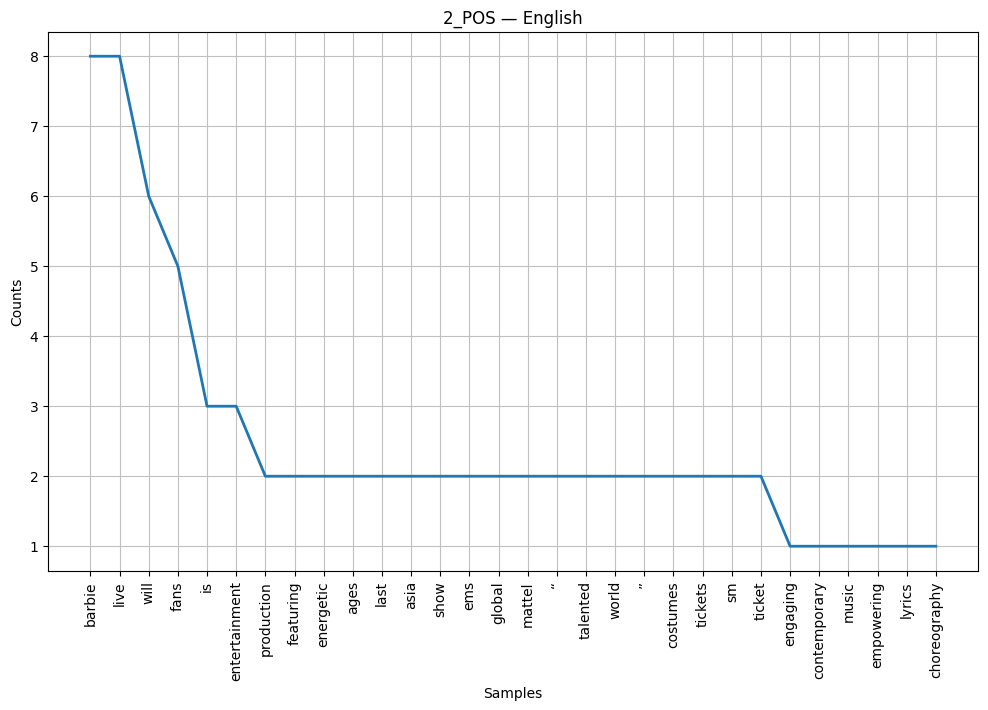


==================== 3_Леммы ====================

→ 3_Леммы — Русский


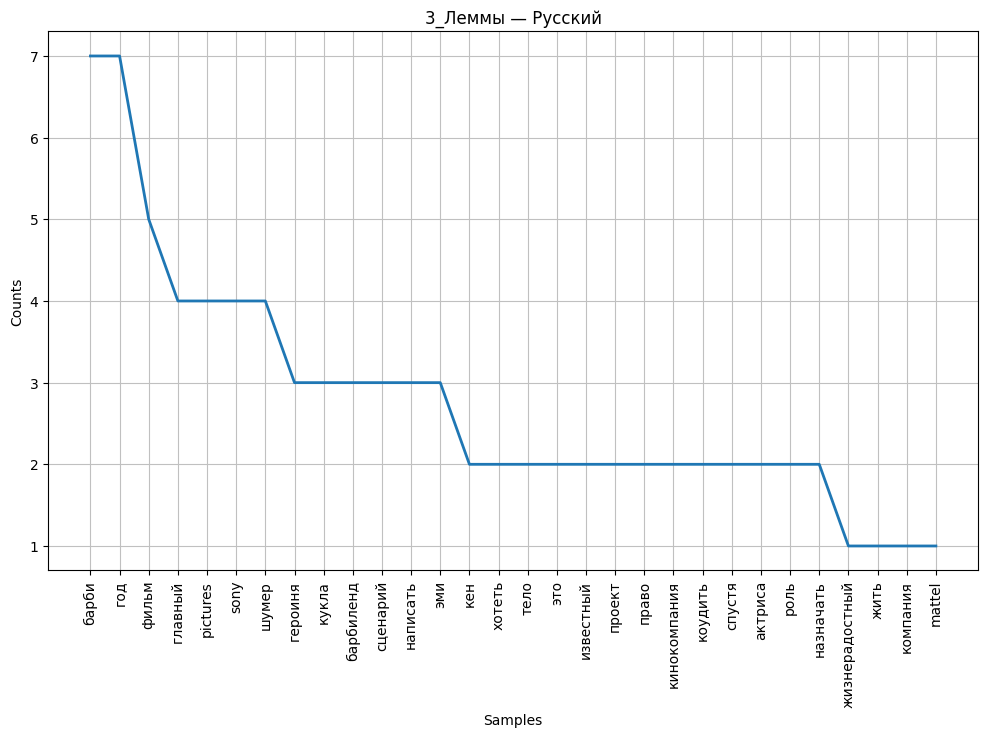

→ 3_Леммы — English


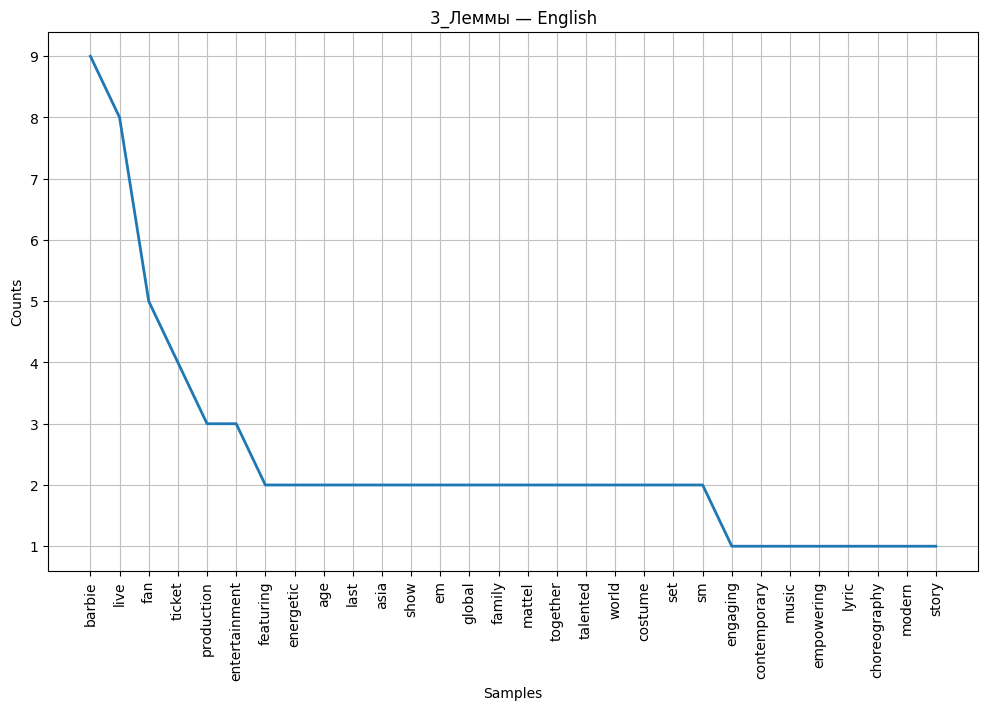

In [38]:
russian_text = """
Главная героиня — жизнерадостная кукла Барби. Она живет в Барбиленде с другими
куклами компании Mattel. Среди них есть куклы-мужчины Кены. Один из них безответно
влюблен в главную героиню и всеми силами хочет ей понравиться.
Однажды Барби замечает, что ее тело меняется. У героини появляется целлюлит и
неприятный запах изо рта. Барби понимает, что это связано с ее хозяйкой из реального
мира. Она отправляется туда вместе с Кеном, который не хочет ее отпускать.

Впервые о разработке фильма стало известно в 2009 году. Тогда проектом занималась
Universal Pictures, но в 2015 она отдала Sony Pictures права на экранизацию.
Кинокомпания объявила, что «Барби» выйдет 2 июня 2017 года. Тогда сценарий поручили
Диабло Коуди, написавшей «Джуно» и «Тело Дженнифер». Спустя некоторое время сценаристка
отказалась от фильма. Коуди заявила, что так и не смогла придумать подходящую историю и даже не написала черновик.

В 2016 году Sony Pictures обратилась к комедийной актрисе Эми Шумер, известной по
фильму «Девушка без комплексов» и шоу «Внутри Эми Шумер». Она написала сценарий о том,
как Барби выгоняют из Барбиленда за несоответствие идеалам красоты. Предполагалось,
что Эми Шумер также исполнит главную роль. Спустя четыре месяца актриса покинула проект,
объяснив решение несовпадением расписаний. В 2023 году Шумер призналась, что на
самом деле причиной были творческие разногласия с продюсерами.

В июле 2017 года Sony Pictures предложила главную роль Энн Хэтэуэй. При этом
концепция осталась той же: фильм рассказывал о неидеальной Барби и ее изгнании
из Барбиленда. В 2018 году сценарий переписала Оливия Милч, соавтор «8 подруг Оушена».
Режиссером назначили Алетеу Джонс, постановщицу комедии «Веселый ужин мамочек».
Sony назначила выход фильма на 2020 год, но не успела начать съемки в срок. Из-за
этого она передала права на «Барби» другой кинокомпании — Warner Bros.
"""

english_text = """
Barbie LIVE! is an engaging production featuring contemporary music with empowering
lyrics, energetic choreography and a modern story line that will appeal to fans of all
ages. Barbie LIVE! debuted last September in Singapore and will travel Asia through 2014.
In Manila, the show will be staged at the Mall of Asia Arena from December 11-15, 2013 with
11 performances only.
EMS Entertainment, leading global creator of high-quality interactive exhibitions, family
entertainment and live stage productions, received the global touring rights to Barbie Live!
 from Mattel in 2012 and has worked for almost two years to bring this vision to reality.

“Together with Mattel we have put an incredibly talented team together which created an
unforgettable show for Barbie fans around the world,” says Christoph Rahofer, President
and CEO of EMS Entertainment. “Barbie LIVE! will give fans the opportunity to engage with
the Barbie brand while spending time with their families and friends making memories that will last beyond the stage.”

From captivating and glamorous costumes, to spectacular lighting and set designs, Barbie
LIVE! will deliver fans a one-of-a-kind production experience featuring the world’s favorite
doll – Barbie. With a talented cast of 19 singers and dancers, dazzling costumes, energetic
songs and awe-inspiring sets, Barbie LIVE! is a must-see for musical fans of all ages.

Tickets for Barbie™ LIVE! is now available in all SM TICKETS outlets located in all SM
Cinema ticket booths. For schedule and ticket information, visit http://www.smtickets.com or call 470 2222.
"""

def clean_text(text):
    text = re.sub(r'\s+', ' ', text.strip())
    return text.lower()

russian_clean = clean_text(russian_text)
english_clean = clean_text(english_text)


def method1_tokens(text, lang='english'):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]
    stop_words = set(stopwords.words('russian' if lang == 'russian' else 'english'))
    filtered = [t for t in tokens if t not in stop_words]
    return filtered


def method2_pos(text, lang='english'):
    tokens = word_tokenize(text)
    if lang == 'russian':
        tagged = pos_tag(tokens, lang='rus')
        important = ['S', 'A', 'V']
    else:
        tagged = pos_tag(tokens, tagset='universal')
        important = ['NOUN', 'ADJ', 'VERB']

    filtered = [word for word, tag in tagged if tag in important]
    return filtered


def method3_lemmas(text, lang='english'):
    if lang == 'russian':
        m = Mystem()
        lemmas = m.lemmatize(text)
        lemmas = [l for l in lemmas if l.strip() and l.isalpha()]
        stop_words = set(stopwords.words('russian'))
        filtered = [l for l in lemmas if l not in stop_words]
        return filtered
    else:
        from nltk.stem import WordNetLemmatizer
        nltk.download('wordnet', quiet=True)
        lemmatizer = WordNetLemmatizer()
        tokens = word_tokenize(text)
        lemmas = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha()]
        stop_words = set(stopwords.words('english'))
        filtered = [l for l in lemmas if l not in stop_words]
        return filtered


methods = {
    '1_Токены': {
        'ru': method1_tokens(russian_clean, 'russian'),
        'en': method1_tokens(english_clean)
    },
    '2_POS': {
        'ru': method2_pos(russian_clean, 'russian'),
        'en': method2_pos(english_clean)
    },
    '3_Леммы': {
        'ru': method3_lemmas(russian_clean, 'russian'),
        'en': method3_lemmas(english_clean)
    }
}

# Визуализация
def plot_top30(words, title):
    freq = FreqDist(words)
    plt.figure(figsize=(12, 7))
    freq.plot(30, title=title, cumulative=False)
    plt.show()


print("Результаты сравнения трёх методов\n")

for method_name, lang_data in methods.items():
    print(f"\n{'='*20} {method_name} {'='*20}\n")

    for lang, words in lang_data.items():
        lang_name = "Русский" if lang == 'ru' else "English"
        title = f"{method_name} — {lang_name}"
        print(f"→ {title}")
        plot_top30(words, title)

Да, результаты отличаются, но немного, при этом для русского языка больше чем, для английского, что обусловлено меньшим количеством флексий в английском. Так, например, при лемматизации русского текста повторов слов больше, единичные упоминания начинаются с 27-го слова, а с 18-го, как при остальных методах обработки текста.